In [410]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import jaccard_score
from sklearn.metrics.cluster import rand_score


In [411]:
#generate data set
#student1 id: 2006786 -> 29
#student2 id: 2005892 -> 26
#student3 id: 1875666 -> 39
#random_state = 29+26 = 94
n_samples = 300
random_state= 94

#data set1
X1,y1 = datasets.make_blobs(n_samples=n_samples,random_state=random_state)

data1 = pd.DataFrame(X1) #tabular data structure 
data1.columns = ['X', 'y'] #Change columns name

#data set2
X2, y2 = datasets.make_blobs(n_samples=n_samples,random_state=random_state) 
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X2 = np.dot(X2,transformation)

data2 = pd.DataFrame(X2)
data2.columns = ['X', 'y']

#data set3
X3, y3 = datasets.make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)

data3 = pd.DataFrame(X3)
data3.columns = ['X', 'y']

#data set4
X4,y4 = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=.05,random_state=random_state)

data4 = pd.DataFrame(X4)
data4.columns = ['X', 'y']

Text(0.5, 1.0, 'data 4')

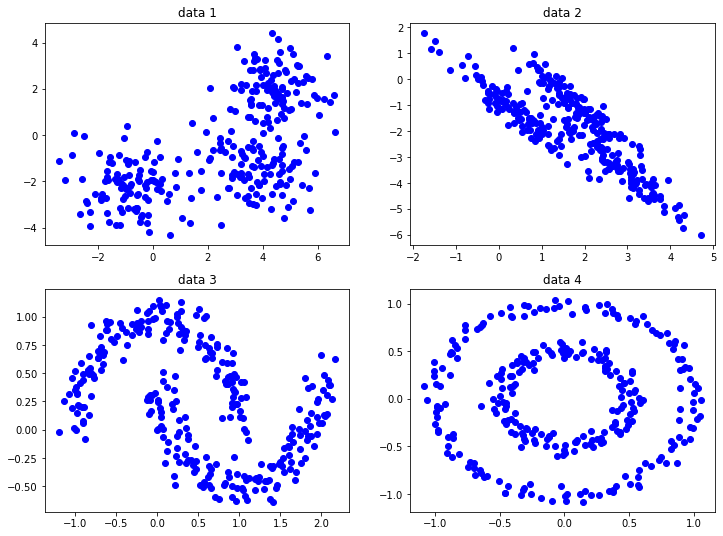

In [412]:
#Visualize data
fig, axes = plt.subplots(2, 2, figsize=(12,9))

axes[0][0].scatter(data1['X'], data1['y'], c = 'b')
axes[0][0].set_title("data 1")

axes[0][1].scatter(data2['X'], data2['y'], c = 'b')
axes[0][1].set_title("data 2")

axes[1][0].scatter(data3['X'], data3['y'], c = 'b')
axes[1][0].set_title("data 3")

axes[1][1].scatter(data4['X'], data4['y'], c = 'b')
axes[1][1].set_title("data 4")

In [413]:
#apply function is used to apply function along an axis,
#and the possible value for axis (0 for row 'default', 1 for column)

def plotClusters(data,centroids): 
    plt.scatter(data['X'], data['y'],c= data['centroid'],cmap='gist_rainbow' ,alpha = 0.6)
    plt.scatter(centroids.T['X'], centroids.T['y'],  marker = 'o', s=90, 
           c= centroids.T.index,cmap='gist_rainbow',edgecolors='black')
    plt.title("Kmean")

# 1-Random initialization of the centroids from the data set
def initialize_centroids(clusters,data):
    centroids = []
    #To create number of centroid equal to the given number of cluster
    for i in range(clusters): 
        #Get a value from each column for the centroid
        centroid = data.apply(lambda x: float(x.sample())) #sample function take randomly single value 
        centroids.append(centroid) #Add centroid to centroids list
    return pd.concat(centroids, axis=1) #concat, used to merge two or more arrays

# 2-Calculate the SSE and set the point to the nearest centroid
def calculate_SSE(data, centroids):
    error = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return error.idxmin(axis=1) #idxmin, return index of the minimum element

# 3-update centroids
def update_centroids(k,data):
    #agg, allow us to apply mean function along the axis
    centroids = data.groupby('centroid').agg('mean').loc[:]
    return centroids.T #to return 2rows (x,y) and 3 colums (0,1,2)

In [414]:
def kmean(data,k):
    
    #initialize random centroid    
    centroids = initialize_centroids(3,data)
    
    #Calculate the error and get labels
    labels = calculate_SSE(data, centroids)
    
    #Add a new column to store the assigned centroids
    data['centroid'] = labels

    oldCentroids = [] #To stop the loop if there is no change in the centroid values
    iteration = 0
    
    # if iteration greater than 100 and old centroids 
    # equal update centroids, exit the loop
    while(iteration < 100 and not centroids.equals(oldCentroids)):
        oldCentroids = centroids
        #Update centroids
        centroids = update_centroids(3,data)
    
        labels = calculate_SSE(data, centroids)
        data['centroid']= labels
        iteration += 1
        
    print("\n",centroids.T,"\n")
    plotClusters(data,centroids)   
    return labels

data1


                  X         y
centroid                    
0        -0.835640 -2.201552
1         3.736940 -1.499761
2         4.410187  2.040057 



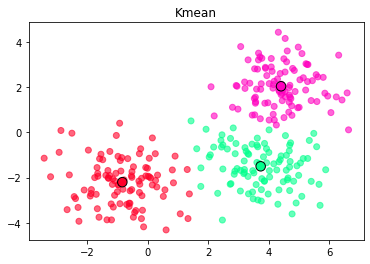

In [415]:
print("data1\n")
y_pred1 = kmean(data1,3)

In [416]:
#F-measure:
K_f1=f1_score(y1, y_pred1, average='macro')

#Normalized mutual information (NMI):
K_NMI1=normalized_mutual_info_score(y1,y_pred1)

#Rand Statistic
K_R1=rand_score(y1,y_pred1)

#summary
table = [['K-mean',K_f1, K_NMI1, K_R1]]
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI', 'Rand Statistic'])
df_rank.set_index('Models')

,F-measures,NMI,Rand Statistic
Models,,,
K-mean,0.319865,0.882769,0.965329


data2


                  X         y
centroid                    
0         3.189888 -3.881746
1         1.723344 -1.753664
2         0.313246 -0.393774 



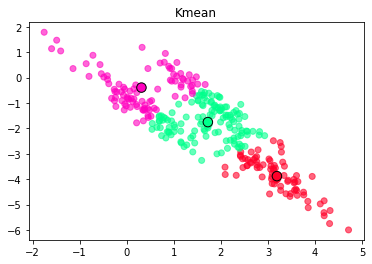

In [417]:
print("data2\n")
y_pred2 = kmean(data2,3)

In [418]:
#F-measure:
K_f2 = f1_score(y2, y_pred2, average='macro')

#Normalized mutual information (NMI):
K_NMI2 = normalized_mutual_info_score(y2,y_pred2)

#Rand Statistic
K_R2 = rand_score(y2,y_pred2)

#summary
table = [['K-mean',K_f2, K_NMI2, K_R2]]
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI', 'Rand Statistic'])
df_rank.set_index('Models')

,F-measures,NMI,Rand Statistic
Models,,,
K-mean,0.31459,0.330315,0.672999


data3


                  X         y
centroid                    
0         0.458447  0.289242
1        -0.610878  0.637391
2         1.522338 -0.162338 



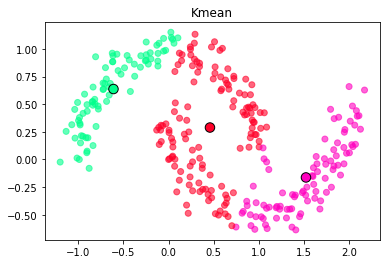

In [419]:
print("data3\n")
y_pred3 = kmean(data3,3)

In [420]:
#F-measure:
K_f3 = f1_score(y3, y_pred3, average='macro')

#Normalized mutual information (NMI):
K_NMI3 = normalized_mutual_info_score(y3,y_pred3)

#Rand Statistic
K_R3 = rand_score(y3,y_pred3)

#summary
table = [['K-mean',K_f3, K_NMI3, K_R3]]
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI', 'Rand Statistic'])
df_rank.set_index('Models')

,F-measures,NMI,Rand Statistic
Models,,,
K-mean,0.157706,0.384679,0.646577


data4


                  X         y
centroid                    
0         0.393244  0.485062
1         0.230297 -0.578283
2        -0.611074  0.083277 



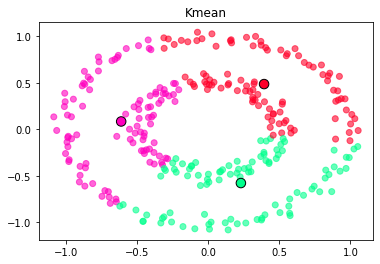

In [421]:
print("data4\n")
y_pred4 = kmean(data4,3)

In [422]:
#F-measure:
K_f4 = f1_score(y4, y_pred4, average='macro')

#Normalized mutual information (NMI):
K_NMI4 = normalized_mutual_info_score(y4,y_pred4)

#Rand Statistic
K_R4 = rand_score(y4,y_pred4)

#summary
table = [['K-mean',K_f4, K_NMI4, K_R4]]
df_rank = pd.DataFrame(table, columns=['Models', 'F-measures','NMI', 'Rand Statistic'])
df_rank.set_index('Models')

,F-measures,NMI,Rand Statistic
Models,,,
K-mean,0.267738,0.000038,0.49835
